# 一、
对Runge函数：
$$R(x) = \frac{1}{1+x^2}, \enspace x \in [-5,5]$$

In [80]:
import numpy as np
import matplotlib.pyplot as plt

In [81]:
def R(x):# Runge函数
    return 1 / (1 + x**2)

1. 用等距节点$x_i = -5 + i(i=0,1,2,\dots,10)$，绘制出它的10次Newton插值多项式的图像

In [82]:
# newton插值
def newton(x, y, xx):
    n = len(x)
    c = np.zeros(n)
    c[0] = y[0]
    for i in range(1, n):
        for j in range(i, n):
            y[j] = (y[j] - y[i - 1]) / (x[j] - x[i - 1])
        c[i] = y[i]
    p = c[n - 1]
    for i in range(n - 2, -1, -1):
        p = p * (xx - x[i]) + c[i]
    return p


In [83]:
x0 = np.linspace(-5, 5, 11)
x = np.linspace(-5, 5, 101)

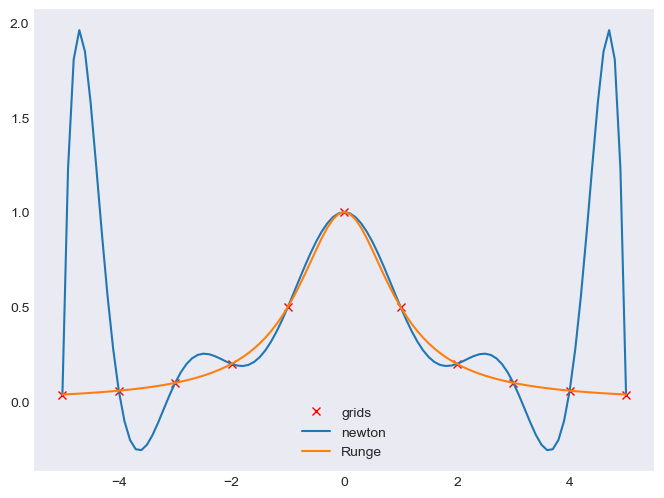

In [84]:
y = newton(x0, R(x0), x)
fig = plt.figure(figsize=(8, 6))
plt.plot(x0,R(x0),color = 'r', linewidth = 0, marker = 'x',label = 'grids')
plt.plot(x, y, label = 'newton')
plt.plot(x, R(x), label = 'Runge')
plt.legend()
plt.show()

In [85]:
#比较无穷范数误差
print("newton插值无穷范数误差：\n",max(abs(y - R(x))))

newton插值无穷范数误差：
 1.9156430502192483


2.用节点$x_i = 5 \cos(\frac{2i+1}{42}\pi)(i= 0, 1, 2, \dots ,10) $，绘制他的20次Lagrange插值多项式图像。

In [86]:
#Lagrange插值
def lagrange(x, y, xx):
    n = len(x)
    p = 0
    for i in range(n):
        l = 1
        for j in range(n):
            if j != i:
                l = l * (xx - x[j]) / (x[i] - x[j])
        p = p + l * y[i]
    return p


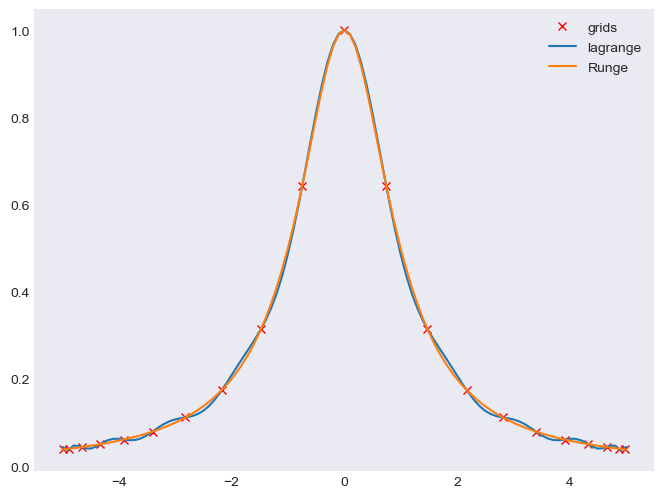

In [87]:
index = np.linspace(0,20,21)
x0 = 5.0 * np.cos((2.0*index+1.0)/42.0 * np.pi)
x = np.linspace(-5, 5, 101)
y = lagrange(x0, R(x0), x)
fig = plt.figure(figsize=(8, 6))
plt.plot(x0,R(x0),color = 'r', linewidth = 0, marker = 'x',label = 'grids')
plt.plot(x, y, label = 'lagrange')
plt.plot(x, R(x), label = 'Runge')
plt.legend()
plt.show()

In [88]:
#比较无穷范数误差
print("切比雪夫插值无穷范数误差：\n",max(abs(y - R(x))))

切比雪夫插值无穷范数误差：
 0.015325088543827303


3.用等距节点$x_i = -5 +i$，绘制其分段线性插值函数图像

In [89]:
#分段线性插值
def linear(x, y, xx):
    n = len(x)
    linear_sum = 0
    for i in range(n - 1):
        basis_func = (y[i+1]-y[i])/(x[i+1]-x[i])*(xx-x[i])+y[i]
        func = lambda t: 1.0 if(t>=x[i] and t<x[i+1]) else 0.0
        cond = np.array(list(map(func, xx)))
        linear_sum += basis_func * cond
    if xx[-1] == x[-1]:
        linear_sum[-1] = y[-1]
    return linear_sum

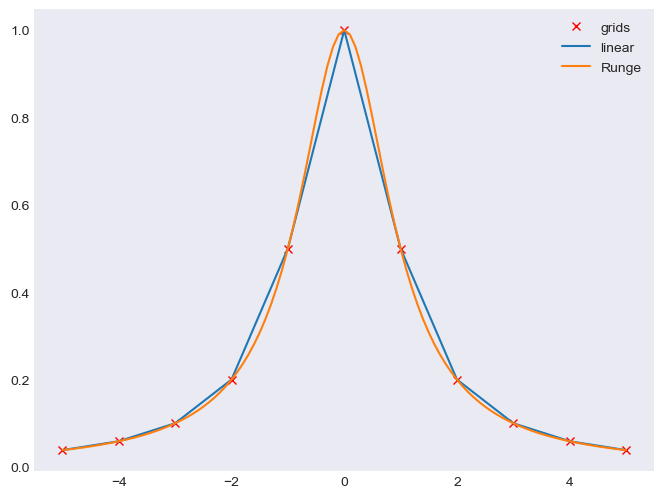

In [90]:
x0=np.linspace(-5,5,11)
x=np.linspace(-5,5,101)
y=linear(x0,R(x0),x)
fig=plt.figure(figsize=(8,6))
plt.plot(x0,R(x0),color='r',linewidth=0,marker='x',label='grids')
plt.plot(x,y,label='linear')
plt.plot(x,R(x),label='Runge')
plt.legend()
plt.show()



In [91]:
#比较无穷范数误差
print("分段线性插值无穷范数误差：\n",max(abs(y - R(x))))

分段线性插值无穷范数误差：
 0.06743119266055053


# 二、
1、FFT解矩阵方程

(由于作业二中矩阵不可逆，不可解。将对角线元素改为3)

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import fft

In [93]:
N=2**10

A=np.diag(3.0*np.ones(N))+np.diag(-1.0*np.ones(N-1),1)+np.diag(-1.0*np.ones(N-1),-1)
A[0,N-1]=-1.0
A[N-1,0]=-1.0
A

array([[ 3., -1.,  0., ...,  0.,  0., -1.],
       [-1.,  3., -1., ...,  0.,  0.,  0.],
       [ 0., -1.,  3., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  3., -1.,  0.],
       [ 0.,  0.,  0., ..., -1.,  3., -1.],
       [-1.,  0.,  0., ...,  0., -1.,  3.]])

In [94]:
b = np.ones(N)

In [95]:
F_b = fft.fft(b)

# F_b中的第一个元素是b的和，其他项均为0
eigen_vals =np.array([3.0-2.0*np.cos(2.0*np.pi*k / N) for k in range(N)])

y = F_b / eigen_vals


x_hat = fft.ifft(y)
print("FFTsolution of Ax =b:\n",x_hat)
x = np.dot(np.linalg.inv(A), b)
print("解x的误差: \n", max(np.abs(x - x_hat)))
b_hat = np.dot(A, x_hat)
print("b的误差: \n", max(np.abs(b - b_hat)))

FFTsolution of Ax =b:
 [1.+0.j 1.+0.j 1.+0.j ... 1.+0.j 1.-0.j 1.+0.j]
解x的误差: 
 4.440892098500626e-16
b的误差: 
 0.0


二、

( 2 ) Solve the Poisson equation:
$$
\begin{equation*}
\left\{
    \begin{array}{ll}
        - u^{"} (x) = f(x), \; x \in (0, \pi)\,          \\
        u(0) = u(\pi) = 0
    \end{array}
    \right.
\end{equation*}
$$
##### with exact solution $u_{\text{ex}}(x) = \sin(x)$.
##### solution.
#### Procedure:
$$
x_i = ih, i = 0, 1, \cdots, N+1, \; h = \frac{\pi}{N+1}.
$$
$$
- u^{"} (x_i) = f(x_i), \; i = 1, \cdots, N, \; \text{and} \; u(x_0) = u(x_{N+1}) = 0.
$$
$$
\frac{g_{i+1} - 2 g_i + g_{i-1}}{h^2} = g_i^{"} + O(h^2),
$$
#####  $g_i = g(x_i)$.
$$
-\frac{g_{i+1} - 2 g_i + g_{i-1}}{h^2} = f_i,
$$
#####  $f_i = f(x_i)$. 

$$
\bf{ A} \cdot \bf{ g} = \bf{ f},
$$
##### $\bf{ g} = (g_1,\dots,g_{N})^T$, $\bf{ f} = (f_1,\dots,f_{N})^T$, $\bf{ A}$ is tridiagonal, with entries:
$$
\begin{equation}
a_{i,j} = \left \lbrace \begin{array}{cr} -\frac{1}{h^2}& |i-j|=1, \\
\frac{2}{h^2} & i=j, \\
0& \text{otherwise}. \end{array}
\right .
\end{equation}
$$
##### A straightforward computation shows that the eigenvectors and corresponding eigenvalues of the matrix $A$ are 
$$
\lambda_k = \frac{2 - 2\cos \left ( \frac{k \pi}{N+1} \right )}{h^2}, \; v^j_k = \sin  \left ( \frac{k j \pi}{N+1} \right ), \; k,j = 1, \dots, N.
$$
##### Consider the Sine matrix and discrete Sine transform (DST)
$$
({\bf S})_{jk}= \sqrt{\frac{2}{N+1}} \sin  \left ( \frac{k j \pi}{N+1} \right ), \; j,k = 1,\cdots,N,
$$
$$
\mathcal{S}[u] = {\bf S} u, \; u \in \mathbb{R}^N.
$$  
##### Furthermore, one have 
$$
{\bf S} = {\bf S}^T, {\bf S} {\bf S}^T = I.
$$
##### and
$$
{\bf S} A {\bf S} = \Lambda := \text{diag}(\lambda_1, \cdots, \lambda_{N}).
$$
##### Thus, 
$$
{\bf S} \bf{ f} = {\bf S} A \bf{ g} = \Lambda {\bf S} \bf{ g}
$$
#### remark:
##### 1. $\bf{ y} = \Lambda^{-1} {\bf S} \bf{ g} = \Lambda^{-1} \mathcal{S}[\bf{ g}]$
##### 2. $\bf{ u}  = S^{-1} y = \mathcal{S}^{-1}[\bf{ y}]$ 



In [99]:
N = 2**10

h = 1.0 / (N + 1) * np.pi
x = [i*h for i in range(1, N+1)]

A = (np.diag(2.0*np.ones(N)) + np.diag(-np.ones(N-1), -1) + np.diag(-np.ones(N-1), 1)) / h**2

func = lambda x: np.sin(x)
u = func

g_x = func(x)
S_g = fft.dst(g_x, type = 1)

eigen_vals = np.array([2.0 - 2.0*np.cos(k*np.pi/(N+1)) for k in range(1, N+1)]) / h**2 
y = S_g / eigen_vals
u_hat = fft.idst(y, type = 1)
u_ex = u(x)

print("Ag = f的离散傅里叶变换解: \n", u_hat)
print("解的误差: \n", max(np.abs(u_ex - u_hat)))

Ag = f的离散傅里叶变换解: 
 [0.00306497 0.0061299  0.00919478 ... 0.00919478 0.0061299  0.00306497]
解的误差: 
 7.828420611755149e-07


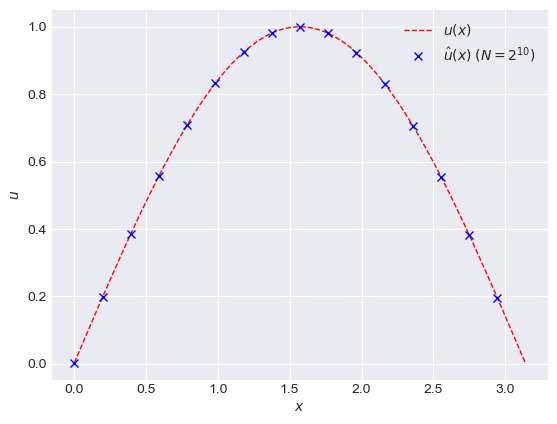

In [97]:
fig = plt.figure()
plt.plot(x, u_ex, color = "r", linewidth = 1.0, linestyle = 'dashed', label = r"$u(x)$")
plt.plot(x, u_hat, color = "b",marker = "x", markevery = 64, linewidth = 0.0, label = r"$\hat{u}(x) \; (N = 2^{10})$")
plt.xlabel(r"$x$")
plt.ylabel(r"$u$")
plt.grid()
plt.legend()
plt.show()